# CLIP (Constrasitive Language and Image Pre-trained model) test

In [2]:
# https://github.com/openai/CLIP

In [1]:
#Check CUDA and torch version
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)
""""
if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

#!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
"""
import numpy as np
import torch
import os

print("Torch version:", torch.__version__)
#os.kill(os.getpid(), 9)


CUDA version: 10.2
Torch version: 1.8.0


## Try with Image embedding only

In [2]:
# Enroll new product{class:description} 
product_descriptions = {"coke": "coke",
            "almondmilk": "amondmilk",
            "wemo": "wemo",
            "dietcoke": "dietcoke",
            "tussin": "tussin DM",
            "tussin_max": "tussin DM max"}

print(list(product_descriptions.keys()))
print(list(product_descriptions.values()))

['coke', 'almondmilk', 'wemo', 'dietcoke', 'tussin', 'tussin_max']
['coke', 'amondmilk', 'wemo', 'dietcoke', 'tussin DM', 'tussin DM max']


In [2]:
%matplotlib inline

import torch
import clip
from PIL import Image
import glob
import matplotlib.pyplot as plt

def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

correct = []

#define our target classificaitons, you can should experiment with these strings of text as you see fit, though, make sure they are in the same order as your class names above
class_names = list(product_descriptions.keys())
candidate_captions = list(product_descriptions.values())
text = clip.tokenize(candidate_captions).to(device)
y_true = []
y_pred = []
for cls in class_names:
    class_correct = []
    test_imgs = glob.glob('./gs_sample/' + cls + '/*.jpeg')
    for img in test_imgs:
        image = transform(Image.open(img)).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            
            logits_per_image, logits_per_text = model(image, text)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            pred = class_names[argmax(list(probs)[0])]
            im = Image.open(img)
            plt.figure(figsize=(5,5))
            plt.imshow(im)
            plt.show()
            
            print(cls, ": "," predicted as ", pred, max(list(probs)[0]) )
            if pred == cls:
                correct.append(1)
                class_correct.append(1)
            else:
                correct.append(0)
                class_correct.append(0)
            y_true.append(cls)
            y_pred.append(pred)
    
    
    print('\naccuracy on class ' + cls + ' is :' + str(sum(class_correct)/len(class_correct)))
print('\naccuracy on all is : ' + str(sum(correct)/len(correct)))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred, labels = class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

NameError: name 'product_descriptions' is not defined

## Improve accuracy with Image Embedding + Text Embedding

In [4]:
# Enroll new product{class:description}
product_descriptions = {"coke": "coke zero sugar bottle",
            "almondmilk": "amondmilk",
            "wemo": "wemo",
            "dietcoke": "diet coke gray bottle",
            "tussin": "tussin DM 8 FL OZ PEAK COLD 10 mL",
            "tussin_max": "tussin DM max 4 FL OZ maximum strength 20 mL"}

print(list(product_descriptions.keys()))
print(list(product_descriptions.values()))

['coke', 'almondmilk', 'wemo', 'dietcoke', 'tussin', 'tussin_max']
['coke zero sugar bottle', 'amondmilk', 'wemo', 'diet coke gray bottle', 'tussin DM 8 FL OZ PEAK COLD 10 mL', 'tussin DM max 4 FL OZ maximum strength 20 mL']


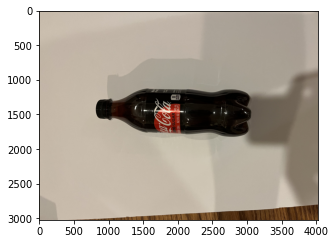

coke :   predicted as  coke 0.766


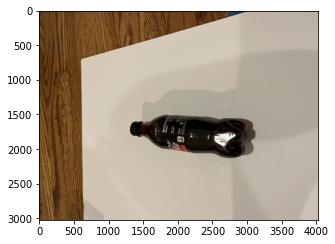

coke :   predicted as  coke 0.7153


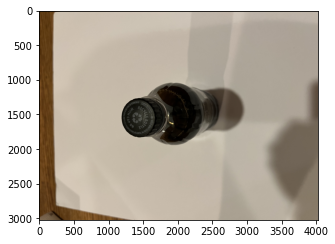

coke :   predicted as  dietcoke 0.574

accuracy on class coke is :0.6666666666666666


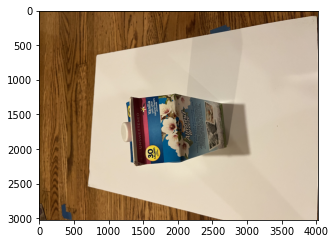

almondmilk :   predicted as  almondmilk 0.645


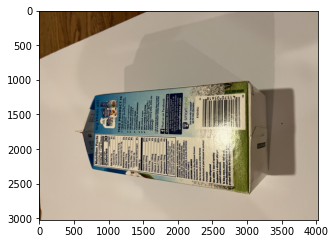

almondmilk :   predicted as  almondmilk 0.8604


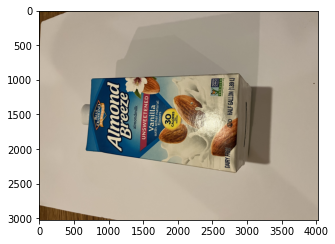

almondmilk :   predicted as  almondmilk 0.9995


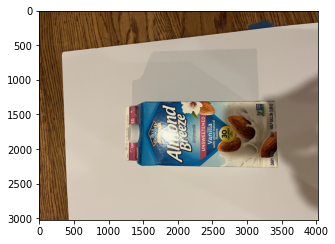

almondmilk :   predicted as  almondmilk 0.991

accuracy on class almondmilk is :1.0


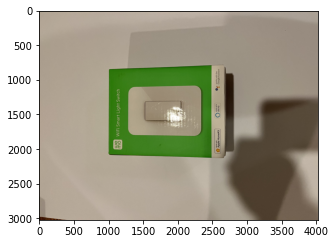

wemo :   predicted as  wemo 0.994


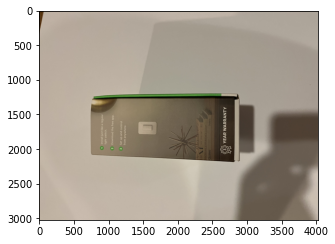

wemo :   predicted as  wemo 0.986


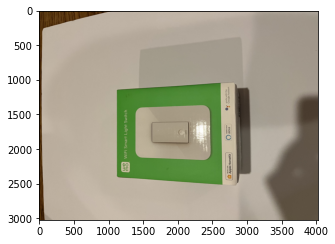

wemo :   predicted as  wemo 0.9927


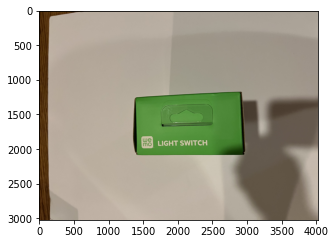

wemo :   predicted as  wemo 0.9985


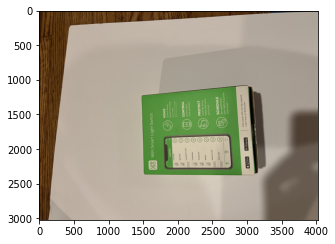

wemo :   predicted as  wemo 0.9727

accuracy on class wemo is :1.0


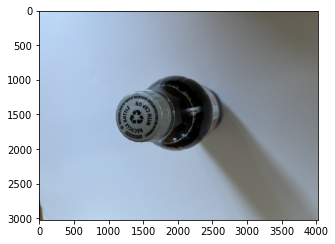

dietcoke :   predicted as  dietcoke 0.7153


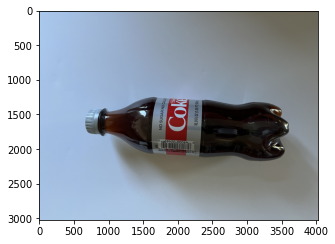

dietcoke :   predicted as  dietcoke 0.686


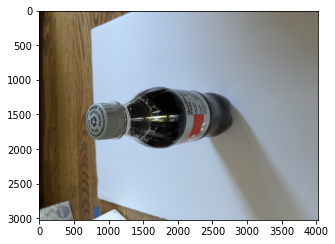

dietcoke :   predicted as  dietcoke 0.815


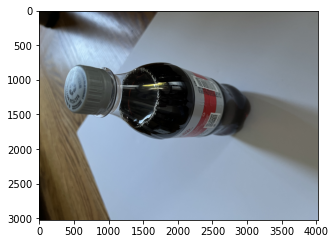

dietcoke :   predicted as  dietcoke 0.782


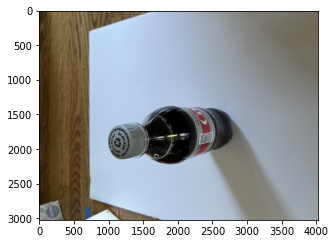

dietcoke :   predicted as  dietcoke 0.8438


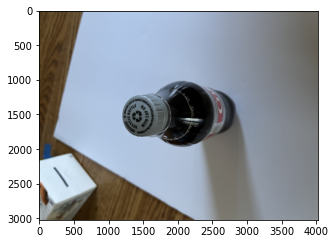

dietcoke :   predicted as  dietcoke 0.6113


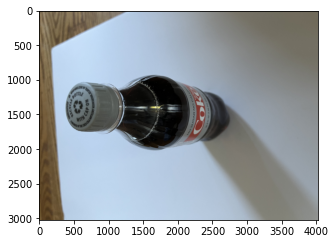

dietcoke :   predicted as  dietcoke 0.638


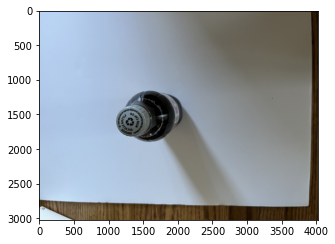

dietcoke :   predicted as  dietcoke 0.6694

accuracy on class dietcoke is :1.0


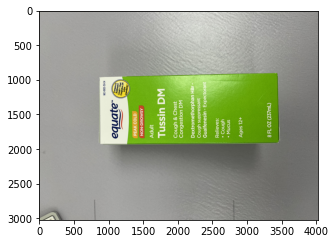

tussin :   predicted as  tussin_max 0.842


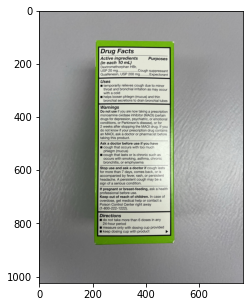

tussin :   predicted as  tussin 0.4436


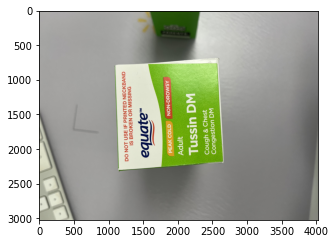

tussin :   predicted as  tussin_max 0.5273

accuracy on class tussin is :0.3333333333333333


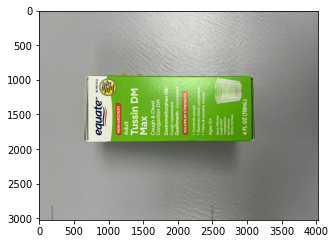

tussin_max :   predicted as  tussin_max 0.685


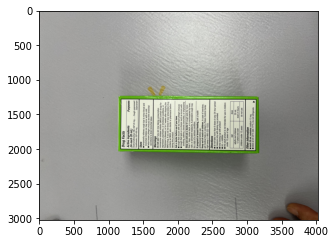

tussin_max :   predicted as  tussin_max 0.5146


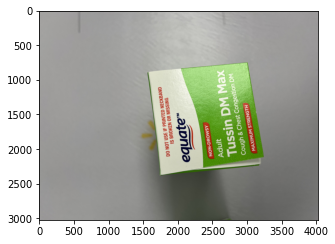

tussin_max :   predicted as  tussin_max 0.633

accuracy on class tussin_max is :1.0

accuracy on all is : 0.8846153846153846


ModuleNotFoundError: No module named 'sklearn'

In [5]:
%matplotlib inline

import torch
import clip
from PIL import Image
import glob
import matplotlib.pyplot as plt

def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

correct = []

#define our target classificaitons, you can should experiment with these strings of text as you see fit, though, make sure they are in the same order as your class names above
class_names = list(product_descriptions.keys())
candidate_captions = list(product_descriptions.values())
text = clip.tokenize(candidate_captions).to(device)
y_true = []
y_pred = []
for cls in class_names:
    class_correct = []
    test_imgs = glob.glob('./gs_sample/' + cls + '/*.jpeg')
    for img in test_imgs:
        image = transform(Image.open(img)).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            
            logits_per_image, logits_per_text = model(image, text)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            pred = class_names[argmax(list(probs)[0])]
            im = Image.open(img)
            plt.figure(figsize=(5,5))
            plt.imshow(im)
            plt.show()
            
            print(cls, ": "," predicted as ", pred, max(list(probs)[0]) )
            if pred == cls:
                correct.append(1)
                class_correct.append(1)
            else:
                correct.append(0)
                class_correct.append(0)
            y_true.append(cls)
            y_pred.append(pred)
    
    
    print('\naccuracy on class ' + cls + ' is :' + str(sum(class_correct)/len(class_correct)))
print('\naccuracy on all is : ' + str(sum(correct)/len(correct)))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred, labels = class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Run with Realsense D435i Streaming

### 1. Tried custom text embedding

In [48]:
# Check available model
clip.available_models()

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'ViT-B/32', 'ViT-B/16']

In [3]:
import pyrealsense2 as rs
import cv2
import numpy as np
import torch
import clip
from PIL import Image

# upload a clip model

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

# Enroll new product{class:description}
product_descriptions = {"coke": "coke zero sugar bottle ",
            "almondmilk": "amondmilk breeze vanilla",
            "wemo": "wemo light switch",
            "dietcoke": "diet coke bottle silver",
            "tussin": "tussin DM 8 FL OZ PEAK COLD 10 mL",
            "tussin_max": "tussin DM max 4 FL OZ maximum strength 20 mL",
            "sweetner": "great value no calorie sweenter 200 count 7 oz",
            "org_almondmilk": "almondmilk organic three trees original white 100 Calories",
            "doorLock": "wi-fi august smart lock door wifi white home",
            "muscle_milk": "muscle milk protein shake",
            "RitzCracker": "Ritz Fresh Stacks Original Crackers Family Size, 17.8 Oz"}


#define our target classificaitons
class_names = list(product_descriptions.keys())
candidate_captions = list(product_descriptions.values())
text = clip.tokenize(candidate_captions).to(device)


def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

try:
    pipeline = rs.pipeline()
    config = rs.config()
    config.enable_stream(rs.stream.color, 640,480, rs.format.bgr8, 30)
    pipeline.start(config)
    
    while True:
        frames = pipeline.wait_for_frames()    
        color_image = np.asarray(frames.get_color_frame().get_data())
        
        img = Image.fromarray(color_image)

        image = transform(img).unsqueeze(0).to(device)   # transform takes PIL image only - See clip.py

        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            
            logits_per_image, logits_per_text = model(image, text)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            pred = class_names[argmax(list(probs)[0])]
            prob = max(list(probs)[0])
            if prob > 0.55:
                class_str = pred + ' ' + str(prob)
            else:
                class_str = "Not recognized"
            
        cv2.namedWindow("Classifier", cv2.WINDOW_NORMAL)
        cv2.resizeWindow("Classifier", 1280, 960)
        cv2.putText(color_image, class_str, (10,25),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)

        cv2.imshow("Classifier",color_image)
        cv2.waitKey(1)
    exit(0)
except Exception as e:
    print(e)
    pass

KeyboardInterrupt: 

### 2. Tried Walmart product name from catalogue item file for text embebdding

In [ ]:
import pyrealsense2 as rs
import cv2
import numpy as np
import torch
import clip
from PIL import Image

# upload a clip model

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

# Enroll new product {upc: walmart product name}
product_descriptions = {"7874222803-sugar": "Great Value Pure Granulated Sugar 4 lb",
            "4157005670-almondmilk": "Blue Diamond Almond Breeze milk Unsweetened Original Almond Milk, Half Gallon, 64 fl oz",
            "8491201426-HoneyBunch": "Honey Bunches of Oats Honey Roasted Heart Healthy Low Fat made with Whole Grain Cereal, 18 ounce",
            "8113118392-tussin": "Equate Tussin Cough Syrup DM Cough Suppressant and Expectorant Wild Cherry Flavor 8 fl oz",
            "8113106123-tussin_max": "Equate Tussin DM Cough Cold Raspberry Menthrol Flavor, 4 fl Oz",
            "7874212406-sweetner": "great value no calorie sweenter 200 count 7 oz",
            "1015803449-Cleanser":"Polident Overnight Whitening Antibacterial Denture Cleanser Tablets,120 Count",
            "4400004575-RitzCracker": "Ritz Fresh Stacks Original Crackers Family Size, 17.8 Oz",
            "3600041777-Wipes": "Cottonelle Flushable Wet Wipes for Adults, 1 Refill Pack, 168 Flushable Wipes",
            "41331112406-Beans": "Goya Pink Beans 15.5 Oz",
            "1411391254-Pistachios":"Wonderful Pistachios No Shell Roasted & Salted 12 Oz"}


#define our target classificaitons
class_names = list(product_descriptions.keys())
candidate_captions = list(product_descriptions.values())
text = clip.tokenize(candidate_captions).to(device)


def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

try:
    pipeline = rs.pipeline()
    config = rs.config()
    config.enable_stream(rs.stream.color, 640,480, rs.format.bgr8, 30)
    pipeline.start(config)
    
    while True:
        frames = pipeline.wait_for_frames()    
        color_image = np.asarray(frames.get_color_frame().get_data())
        
        img = Image.fromarray(color_image)

        image = transform(img).unsqueeze(0).to(device)   # transform takes PIL image only - See clip.py

        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            
            logits_per_image, logits_per_text = model(image, text)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            pred = class_names[argmax(list(probs)[0])]
            prob = max(list(probs)[0])
            if prob > 0.55:
                class_str = pred + ' ' + str(prob)
            else:
                class_str = "Not recognized"
            
        cv2.namedWindow("Classifier", cv2.WINDOW_NORMAL)
        cv2.resizeWindow("Classifier", 1280, 960)
        cv2.putText(color_image, class_str, (10,25),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)

        cv2.imshow("Classifier",color_image)
        cv2.waitKey(1)
    exit(0)
except Exception as e:
    print(e)
    pass